# Figure 3


In [1]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#Clear environment: 
rm(list=ls())
setwd("/Users/User_1/Desktop/rAF_project_2")

# Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

In [3]:

## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"
df_name_3 = "UK.BB"

## Read in dataframe (total)
df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )


# Read in rAF-hi indels file for each dataset: 

In [4]:

rAF_hi_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)


In [5]:
#Declare your bp range:

bp_range = c("10", "20", "30", "40")

In [6]:
#Define your sAF_lo threshold:
sAF_lo = (1 * 10^-4)

# Find the total number of indels that are sAF-lo by sAF 

In [7]:
tot_sAF_lo_sAF_df1 = nrow(df_1 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df2 = nrow(df_2 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df3 = nrow(df_3 %>% filter(sAF <= sAF_lo))


# Calculate the number and percentages of the sAF_lo sAF indels that are also sAF-lo by rAF for each bp window and also calculate the number and percentages of the sAF-lo sAF indels that are rAF-hi (sAF-hi by rAF for each bp window) 

In [8]:

for (i in bp_range) {
  # call that var
  temp_df_1 = paste0("rAF_hi_bp_", i, "_df_1")
  temp_df_2 = paste0("rAF_hi_bp_", i, "_df_2")
  temp_df_3 = paste0("rAF_hi_bp_", i, "_df_3")
  
  ## calculate the number of rAF_hi indels 
  num_df_1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  assign(num_df_1, nrow(get(temp_df_1)))

  num_df_2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  assign(num_df_2, nrow(get(temp_df_2)))

  num_df_3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  assign(num_df_3, nrow(get(temp_df_3)))
  
  # get the number of rAF_lo indels 
  rAF_lo_df_1 = paste0("num_rAF_lo_bp_", i , "_df_1")
  assign(rAF_lo_df_1, (tot_sAF_lo_sAF_df1 - nrow(get(temp_df_1))))

  rAF_lo_df_2 = paste0("num_rAF_lo_bp_", i , "_df_2")
  assign(rAF_lo_df_2, (tot_sAF_lo_sAF_df2 - nrow(get(temp_df_2))))


  rAF_lo_df_3 = paste0("num_rAF_lo_bp_", i , "_df_3")
  assign(rAF_lo_df_3, (tot_sAF_lo_sAF_df3 - nrow(get(temp_df_3))))
  
  
  ## calculate the percentage and save in dynamic variable 
  percent_df_1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  assign(percent_df_1, paste0(round(((get(num_df_1) / tot_sAF_lo_sAF_df1) * 100 ),0), "%"))

  percent_df_2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  assign(percent_df_2, paste0(round(((get(num_df_2) / tot_sAF_lo_sAF_df2) * 100 ),0), "%"))
  
  percent_df_3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  assign(percent_df_3, paste0(round(((get(num_df_3) / tot_sAF_lo_sAF_df3) * 100 ),0), "%"))
  
  ## find the percentage of the sAF_lo sAF/rAF_lo rAF genes 
  percent_diff_df_1 = paste0("percent_rAF_lo_bp_", i, "_df_1")
  assign(percent_diff_df_1, paste0(round(((get(rAF_lo_df_1) / tot_sAF_lo_sAF_df1) * 100 ),0), "%"))
  
  percent_diff_df_2 = paste0("percent_rAF_lo_bp_", i, "_df_2")
  assign(percent_diff_df_2, paste0(round(((get(rAF_lo_df_2) / tot_sAF_lo_sAF_df2) * 100 ),0), "%"))

  percent_diff_df_3 = paste0("percent_rAF_lo_bp_", i, "_df_3")
  assign(percent_diff_df_3, paste0(round(((get(rAF_lo_df_3) / tot_sAF_lo_sAF_df3) * 100 ),0), "%")) 
}

# Make dataframe for graph 

Saving 7 x 7 in image


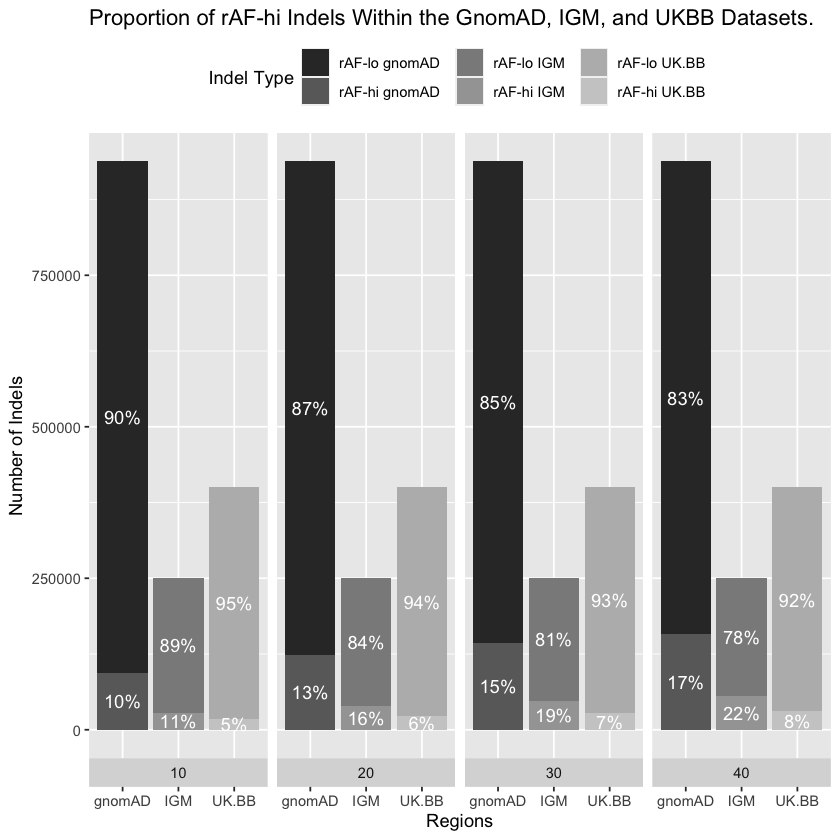

In [9]:
windows = c(rep(bp_range, 2))
condition = c(rep("rAF_lo", 4), rep("rAF_hi", 4))


num_indels = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1, num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1, num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2, num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2, num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3, num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)


perct_indels = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1, percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1, percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2, percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2, percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3, percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3 )

df_labels = c(rep(df_name_1, 8), rep(df_name_2, 8),rep(df_name_3, 8))


graph_df = data.frame(windows, condition, num_indels, perct_indels, df_labels)

#Make graph 

ggplot(graph_df, aes(x = df_labels, y = num_indels, fill = interaction(condition, df_labels))) + geom_bar(stat = "identity", position = "stack") + facet_grid(~windows, switch = "both")  +  theme(legend.position = "top") + labs(title = "Proportion of rAF-hi Indels Within the GnomAD, IGM, and UKBB Datasets.", y = "Number of Indels", x = "Regions", fill = "Indel Type") +  geom_text(aes(label = perct_indels), color = "white", position = position_stack(vjust = 0.5)) + scale_fill_grey(labels = c(paste0("rAF-lo ", df_name_1), paste0 ("rAF-hi ", df_name_1), paste0("rAF-lo ", df_name_2), paste0 ("rAF-hi ", df_name_2), paste0("rAF-lo ", df_name_3), paste0 ("rAF-hi ", df_name_3)))
ggsave("fig3.jpg")



In [10]:
for (i in bp_range) {
  num_df1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  num_df2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  num_df3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  
  prct_df1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  prct_df2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  prct_df3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  
  print (paste0("In the dataframe ", df_name_1, " there are ", get(num_df1), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_1, " rAF_hi indels account for ", get(prct_df1), " percent in the ",i,"bp sliding window."))


  print (paste0("In the dataframe ", df_name_2, " there are ", get(num_df2), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_2, " rAF_hi indels account for ", get(prct_df2), " percent in the ",i,"bp sliding window."))
  
  print (paste0("In the dataframe ", df_name_3, " there are ", get(num_df3), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_3, " rAF_hi indels account for ", get(prct_df3), " percent in the ",i,"bp sliding window."))
}

graph_df

[1] "In the dataframe gnomAD there are 93715 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe gnomAD rAF_hi indels account for 10% percent in the 10bp sliding window."
[1] "In the dataframe IGM there are 28436 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe IGM rAF_hi indels account for 11% percent in the 10bp sliding window."
[1] "In the dataframe UK.BB there are 18121 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe UK.BB rAF_hi indels account for 5% percent in the 10bp sliding window."
[1] "In the dataframe gnomAD there are 123821 rAF_hi indels in the 20bp sliding window."
[1] "In the dataframe gnomAD rAF_hi indels account for 13% percent in the 20bp sliding window."
[1] "In the dataframe IGM there are 39329 rAF_hi indels in the 20bp sliding window."
[1] "In the dataframe IGM rAF_hi indels account for 16% percent in the 20bp sliding window."
[1] "In the dataframe UK.BB there are 22943 rAF_hi indels in the 20bp sliding window."
[1] "In

windows,condition,num_indels,perct_indels,df_labels
<chr>,<chr>,<int>,<chr>,<chr>
10,rAF_lo,93715,10%,gnomAD
20,rAF_lo,123821,13%,gnomAD
30,rAF_lo,143677,15%,gnomAD
40,rAF_lo,158197,17%,gnomAD
10,rAF_hi,844310,90%,gnomAD
20,rAF_hi,814204,87%,gnomAD
30,rAF_hi,794348,85%,gnomAD
40,rAF_hi,779828,83%,gnomAD
10,rAF_lo,28436,11%,IGM


# Make Supplementary Tables S5, S6, and S7. 

In [19]:



sAF_lo_df1 = c(rep(tot_sAF_lo_sAF_df1,4))
rAF_hi_df1 = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1)
rAF_hi_prct_df1 = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1)
rAF_lo_raf_df1 = c(num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1)
rAF_lo_raf_prct_df1 = c(percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1)

TableS5 = data.frame(bp_range, sAF_lo_df1, rAF_hi_df1, rAF_hi_prct_df1, rAF_lo_raf_df1, rAF_lo_raf_prct_df1)
#adds commas 
TableS5 <- format(TableS5, big.mark = ",")

TableS5$bp_range <- paste(TableS5$bp_range, "bps", sep = " ")
colnames(TableS5) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi","rAF-lo", "percent rAF-lo")
TableS5

sAF_lo_df2 = c(rep(tot_sAF_lo_sAF_df2,4))
rAF_hi_df2 = c(num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2)
rAF_hi_prct_df2 = c(percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2)
rAF_lo_raf_df2 = c(num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2)
rAF_lo_raf_prct_df2 = c(percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2)

TableS6 = data.frame(bp_range, sAF_lo_df2, rAF_hi_df2, rAF_hi_prct_df2, rAF_lo_raf_df2, rAF_lo_raf_prct_df2)
TableS6 <- format(TableS6, big.mark = ",")
TableS6$bp_range <- paste(TableS6$bp_range, "bps", sep = " ")
colnames(TableS6) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi","rAF-lo", "percent rAF-lo")
TableS6

sAF_lo_df3 = c(rep(tot_sAF_lo_sAF_df3,4))
rAF_hi_df3 = c(num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3)
rAF_hi_prct_df3 = c(percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3)
rAF_lo_raf_df3 = c(num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)
rAF_lo_raf_prct_df3 = c(percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3)

TableS7 = data.frame(bp_range, sAF_lo_df3, rAF_hi_df3, rAF_hi_prct_df3, rAF_lo_raf_df3, rAF_lo_raf_prct_df3)
TableS7 <- format(TableS7, big.mark = ",")
TableS7$bp_range <- paste(TableS7$bp_range, "bps", sep = " ")
colnames(TableS5) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi","rAF-lo", "percent rAF-lo")
fwrite(TableS7, "TableS5_UKBB.csv")

,Range,sAF-lo,Nb. of rAF-hi Indels,Percentage of sAF-lo Indels that are rAF-hi,rAF-lo,percent rAF-lo
,<chr>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,10 bps,"938,025","93,715",10%,"844,310",90%
2,20 bps,"938,025","123,821",13%,"814,204",87%
3,30 bps,"938,025","143,677",15%,"794,348",85%
4,40 bps,"938,025","158,197",17%,"779,828",83%


,Range,sAF-lo,Nb. of rAF-hi Indels,Percentage of sAF-lo Indels that are rAF-hi,rAF-lo,percent rAF-lo
,<chr>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,10 bps,"250,269","28,436",11%,"221,833",89%
2,20 bps,"250,269","39,329",16%,"210,940",84%
3,30 bps,"250,269","48,224",19%,"202,045",81%
4,40 bps,"250,269","55,962",22%,"194,307",78%


In [20]:
TableS7

,bp_range,sAF_lo_df3,rAF_hi_df3,rAF_hi_prct_df3,rAF_lo_raf_df3,rAF_lo_raf_prct_df3
,<chr>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,10 bps,"399,844","18,121",5%,"381,723",95%
2,20 bps,"399,844","22,943",6%,"376,901",94%
3,30 bps,"399,844","27,045",7%,"372,799",93%
4,40 bps,"399,844","30,249",8%,"369,595",92%
